## Importowanie potrzebnych biblotek

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Wczytanie danych

In [2]:
df = pd.read_csv('./data/movies.csv')
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Released,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,1011985-1275232-359410-601796-967847-653346-69...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


## Zliczenie ile brakuje danych

In [3]:
df.isnull().sum()

id                           0
title                        6
genres                  210425
original_language            0
overview                118306
popularity                   0
production_companies    385102
release_date             51743
budget                       0
revenue                      0
runtime                  34355
status                       0
tagline                 614033
vote_average                 0
vote_count                   0
credits                 224800
keywords                511889
poster_path             184651
backdrop_path           499395
recommendations         687037
dtype: int64

## Sprawdzenie podstawowych miar stastycznych

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,722418.000000,722418.000000,7.224180e+05,7.224180e+05,6.880630e+05,722418.000000,722418.000000
mean,526916.813744,1.893531,4.006937e+05,9.970940e+05,1.990511e+02,2.445818,28.216981
std,253191.890230,24.730607,8.198511e+06,2.034466e+07,8.583752e+04,3.176372,391.991154
min,2.000000,0.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,328916.250000,0.600000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,533351.500000,0.600000,0.000000e+00,0.000000e+00,5.000000e+01,0.000000,0.000000
75%,737851.750000,1.301000,0.000000e+00,0.000000e+00,9.000000e+01,5.600000,2.000000
max,968161.000000,10484.676000,5.000000e+09,2.920357e+09,5.050505e+07,10.000000,33262.000000


In [5]:
df[['vote_average', 'vote_count']].describe()

,vote_average,vote_count
count,722418.000000,722418.000000
mean,2.445818,28.216981
std,3.176372,391.991154
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,5.600000,2.000000
max,10.000000,33262.000000


In [6]:
df = df.sort_values('vote_count')

In [7]:
df['vote_count']

361208        0.0
341136        0.0
341135        0.0
539855        0.0
341133        0.0
           ...   
576       29108.0
429       29643.0
425       31145.0
241       33232.0
808       33262.0
Name: vote_count, Length: 722418, dtype: float64

In [8]:
count_above_1000 = (df['vote_count'] > 5000).sum()

In [9]:
df['runtime']

361208      0.0
341136     90.0
341135     28.0
539855     70.0
341133      0.0
          ...  
576       143.0
429       108.0
425       152.0
241       169.0
808       148.0
Name: runtime, Length: 722418, dtype: float64

In [10]:
df['vote_average']

361208    0.000
341136    0.000
341135    0.000
539855    0.000
341133    0.000
          ...  
576       7.710
429       7.610
425       8.513
241       8.423
808       8.361
Name: vote_average, Length: 722418, dtype: float64

/var/folders/yk/9vq11z5916j0ynyrw4xvlr9w0000gn/T/ipykernel_73880/3894001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average', y="title", data=data, palette='inferno')


<Axes: xlabel='vote_average', ylabel='title'>

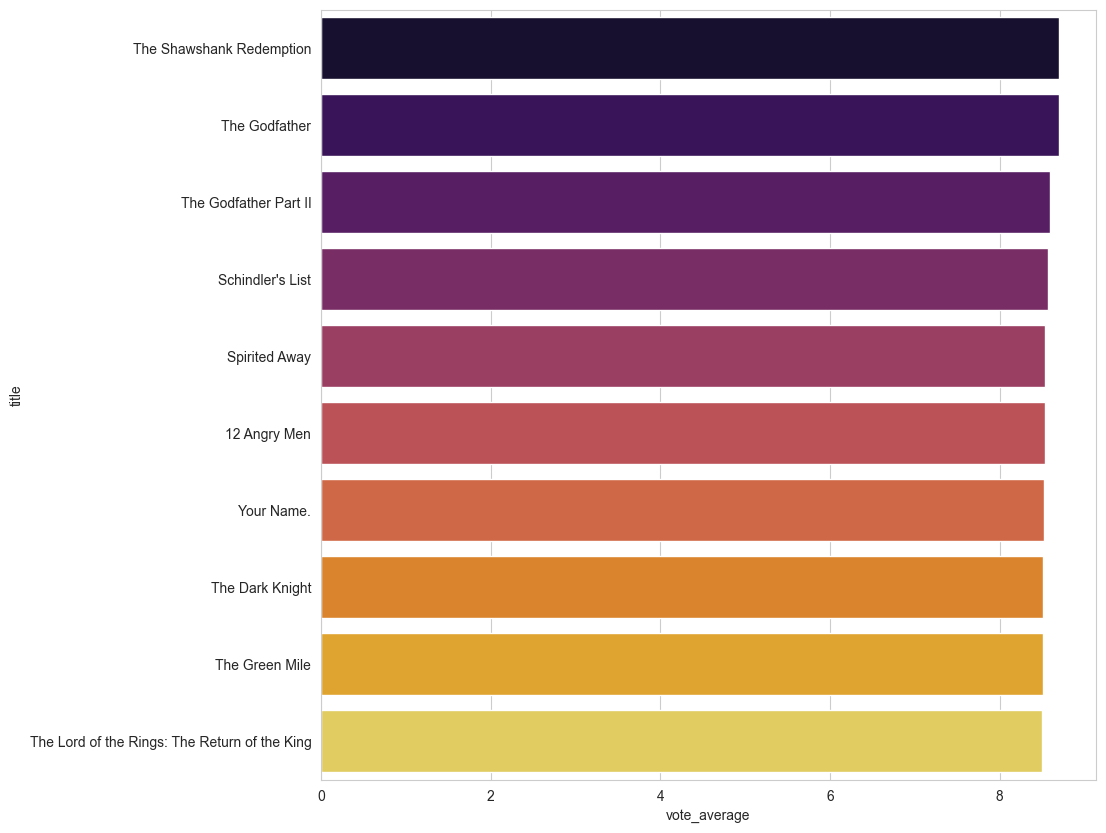

In [11]:
top_ten = df[df['vote_count'] > 5000]
top_ten.sort_values(by='vote_average', ascending=False)
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='vote_average', ascending=False).head(10)
sns.barplot(x='vote_average', y="title", data=data, palette='inferno')

Text(0.5, 0, 'Average rating')

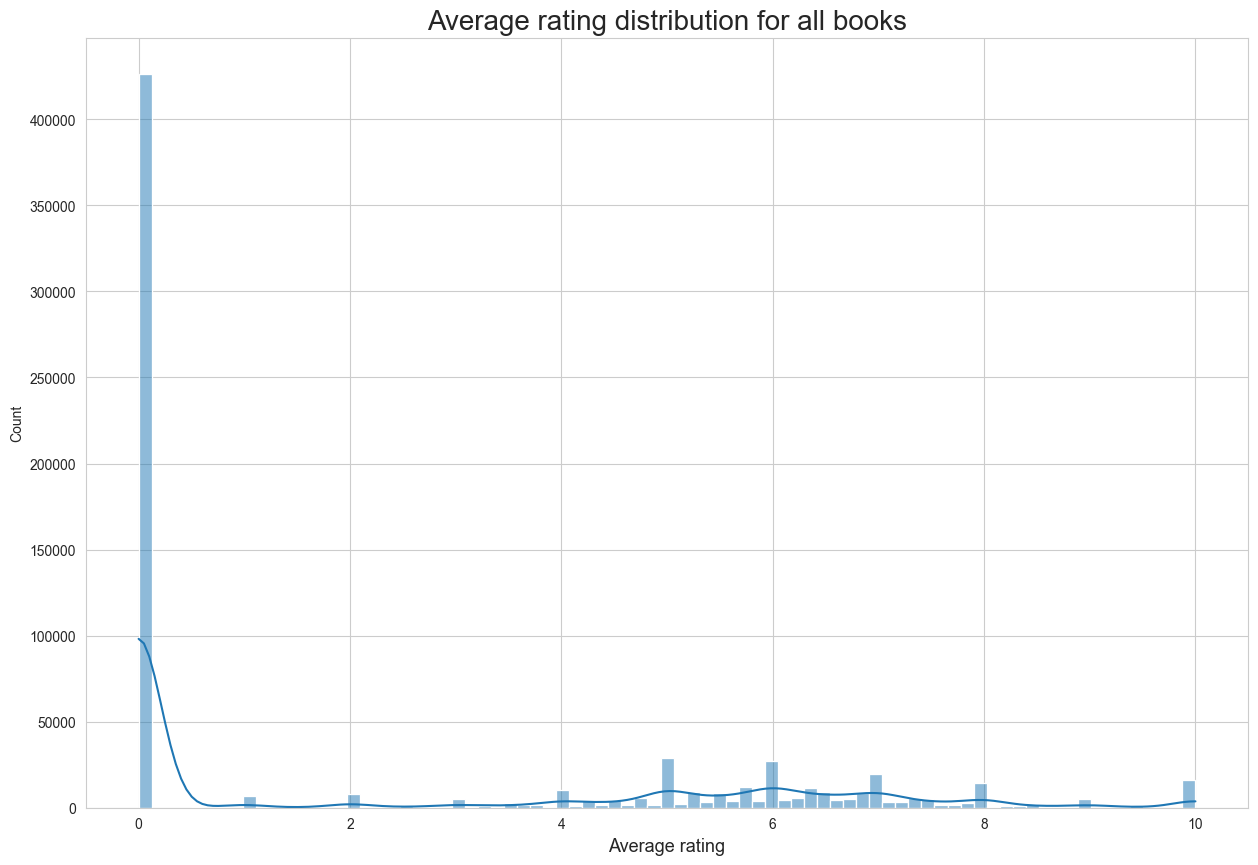

In [12]:

df.vote_average = df.vote_average.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.histplot(df['vote_average'], kde=True, ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

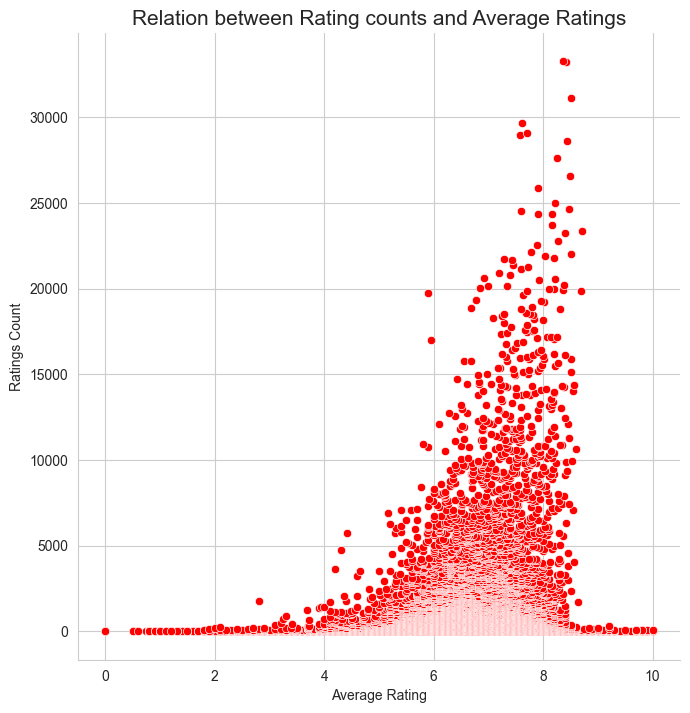

In [13]:
ax = sns.relplot(data=df, x="vote_average", y="vote_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [14]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations'],
      dtype='object')

In [15]:
df_copy = df.copy()

In [16]:
# Przypisywanie przedziałów ocen
df_copy.loc[(df_copy['vote_average'] >= 0) & (df_copy['vote_average'] <= 1), 'rating_between'] = "between 0 and 1"
df_copy.loc[(df_copy['vote_average'] > 1) & (df_copy['vote_average'] <= 2), 'rating_between'] = "between 1 and 2"
df_copy.loc[(df_copy['vote_average'] > 2) & (df_copy['vote_average'] <= 3), 'rating_between'] = "between 2 and 3"
df_copy.loc[(df_copy['vote_average'] > 3) & (df_copy['vote_average'] <= 4), 'rating_between'] = "between 3 and 4"
df_copy.loc[(df_copy['vote_average'] > 4) & (df_copy['vote_average'] <= 5), 'rating_between'] = "between 4 and 5"
df_copy.loc[(df_copy['vote_average'] > 5) & (df_copy['vote_average'] <= 6), 'rating_between'] = "between 5 and 6"
df_copy.loc[(df_copy['vote_average'] > 6) & (df_copy['vote_average'] <= 7), 'rating_between'] = "between 6 and 7"
df_copy.loc[(df_copy['vote_average'] > 7) & (df_copy['vote_average'] <= 8), 'rating_between'] = "between 7 and 8"
df_copy.loc[(df_copy['vote_average'] > 8) & (df_copy['vote_average'] <= 9), 'rating_between'] = "between 8 and 9"
df_copy.loc[(df_copy['vote_average'] > 9) & (df_copy['vote_average'] <= 10), 'rating_between'] = "between 9 and 10"



In [17]:
rating_df = pd.get_dummies(df_copy['rating_between'])

In [18]:
language_df = pd.get_dummies(df_copy['original_language'])

In [19]:
features = pd.concat([rating_df, 
                      language_df, 
                      df_copy['vote_average'], 
                      df_copy['vote_count']], axis=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [21]:
features

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.8513    ,
        0.9363538 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8423    ,
        0.99909807],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8361    ,
        1.        ]])

In [22]:
# model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
# model.fit(features)
# dist, idlist = model.kneighbors(features)

In [23]:
from sklearn.model_selection import train_test_split

X = features
y = df_copy['title']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.neighbors import NearestNeighbors

# Ustawienie liczby sąsiadów, tutaj np. 10
n_neighbors = 10

knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(X_train)


In [25]:
def recommend_movies(title, n_recommendations=5):
    if title not in y_train.values:
        return "Film nie znaleziony w bazie treningowej."

    # Znalezienie indeksu filmu
    idx = y_train[y_train == title].index[0]
    movie_features = X_train[idx].reshape(1, -1)

    # Znalezienie najbliższych sąsiadów
    distances, indices = knn.kneighbors(movie_features, n_neighbors=n_recommendations + 1)

    # Pobranie tytułów filmów na podstawie indeksów
    recommendations = []
    for i in range(1, len(indices[0])):
        recommendations.append(y_train.iloc[indices[0][i]])

    return recommendations


In [29]:
# Przykład użycia funkcji rekomendującej
title = "Toy Story"  # Podaj tytuł filmu, który chcesz użyć do rekomendacji
recommendations = recommend_movies(title, n_recommendations=5)

print(f"Rekomendacje dla filmu '{title}':")
for rec in recommendations:
    print(rec)


Rekomendacje dla filmu 'Toy Story':
Nightmare at Bittercreek
Photograph
Spiked
Brabham
Painted Desert


In [27]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations'],
      dtype='object')